# Meta data exploration

Explore patterns in the metadata

In [39]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv

In [40]:
sns.set_style('darkgrid')

In [41]:
load_dotenv()

True

## Load data

In [42]:
root = os.getenv('DATA_ROOT')

In [43]:
df = pd.read_csv(f'{root}/metadata_train.csv')
df.head()

,Entity ID,Agency,Vendor ID,Recording Technique,Project,Event,Roll,Frame,Acquisition Date,Scale,...,SE Corner Lat dec,SE Corner Long dec,SW Corner Lat dec,SW Corner Long dec,TrainType,Link,BlockR,BlockC,TileId,State
0,AR1VASL00020079,1,NaN,1.0,VASL0,NaN,000002,79.0,1963/05/14,20000.0,...,40.288895,-122.247969,40.287993,-122.300220,Train,https://earthexplorer.usgs.gov/scene/metadata/...,53,31,R04C05,California
1,ARA010907209088,A,NaN,1.0,01090,NaN,000072,9088.0,1954/09/05,60000.0,...,40.030219,-120.338994,40.023114,-120.498849,Train,https://earthexplorer.usgs.gov/scene/metadata/...,133,133,R04C08,California
2,ARA010907509636,A,NaN,1.0,01090,NaN,000075,9636.0,1954/09/05,60000.0,...,40.256337,-120.301364,40.257533,-120.462025,Train,https://earthexplorer.usgs.gov/scene/metadata/...,49,153,R04C08,California
3,AR1VDYK00050168,1,NaN,1.0,VDYK0,NaN,000005,168.0,1975/09/24,78000.0,...,40.107275,-121.477772,40.107166,-121.681031,Train,https://earthexplorer.usgs.gov/scene/metadata/...,92,124,R04C06,California
4,ARA010907709738,A,NaN,1.0,01090,NaN,000077,9738.0,1954/09/05,60000.0,...,40.099927,-121.665096,40.102513,-121.825503,Train,https://earthexplorer.usgs.gov/scene/metadata/...,98,30,R04C06,California


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity  ID                      64082 non-null  object 
 1   Agency                          64082 non-null  object 
 2   Vendor ID                       0 non-null      float64
 3   Recording Technique             64082 non-null  float64
 4   Project                         64082 non-null  object 
 5   Event                           1223 non-null   object 
 6   Roll                            64082 non-null  object 
 7   Frame                           64077 non-null  float64
 8   Acquisition Date                64082 non-null  object 
 9   Scale                           64082 non-null  float64
 10  High Resolution Download Avail  64082 non-null  float64
 11  Strip Number                    64082 non-null  float64
 12  Image Type                      

In [10]:
df[~df['Event'].isnull()]['Event'].unique()

array(['EDCDUPE'], dtype=object)

In [11]:
df[df['Link'].isnull()]['TileId'].value_counts()

TileId
R13C14    45
R10C14    13
R09C09     8
R14C08     4
Name: count, dtype: int64

Notes
- vendor is always null
- there are a few occurrences of the event EDCDUPE
- there are a few frame recordings missing
- there are a few missing links mostly around tile R13C14

In [12]:
df.shape

(64152, 47)

In [13]:
df = df[~df['Link'].isnull()]

In [14]:
df.shape

(64082, 47)

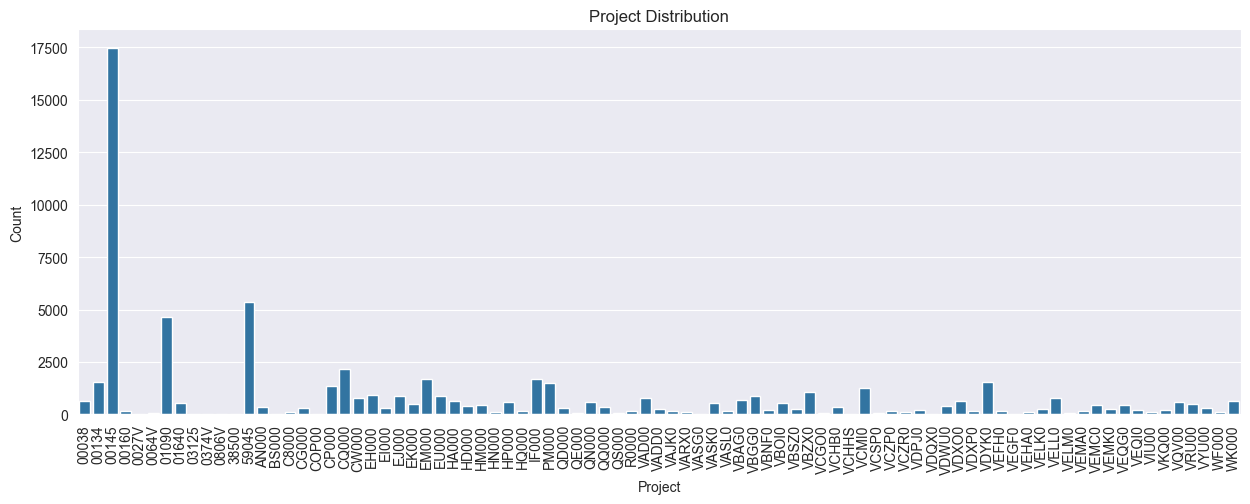

In [15]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(df.sort_values('Project'), x='Project')
ax.set_xlabel('Project')
ax.set_ylabel('Count')
ax.set_title('Project Distribution')
plt.xticks(rotation=90)
plt.show()

In [16]:
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'])

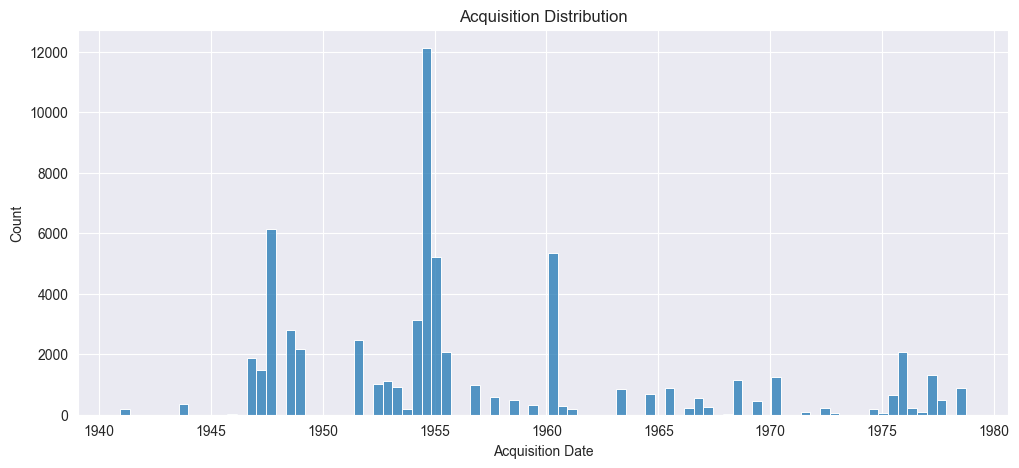

In [17]:
fig = plt.figure(figsize=(12, 5))
ax = sns.histplot(df.sort_values('Acquisition Date'), x='Acquisition Date')
ax.set_xlabel('Acquisition Date')
ax.set_ylabel('Count')
ax.set_title('Acquisition Distribution')
plt.show()

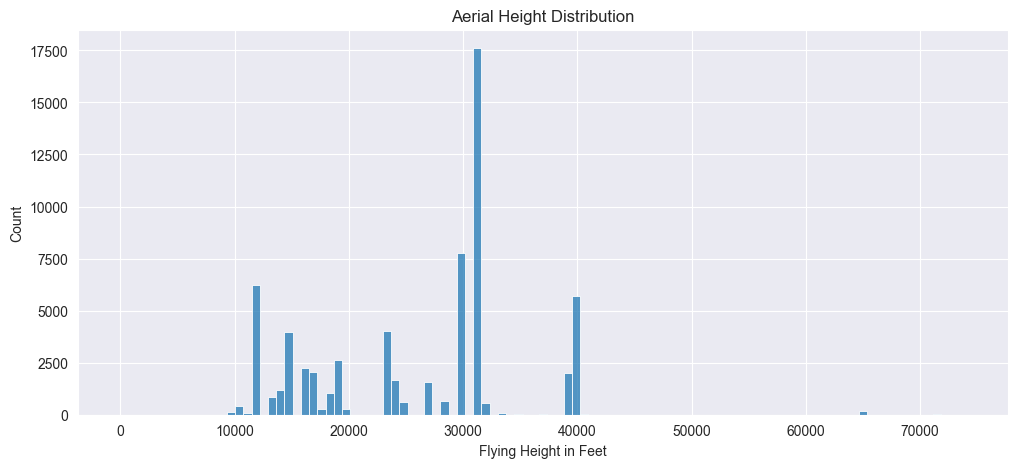

In [36]:
fig = plt.figure(figsize=(12, 5))
ax = sns.histplot(df, x='Flying Height in Feet')
ax.set_xlabel('Flying Height in Feet')
ax.set_ylabel('Count')
ax.set_title('Aerial Height Distribution')
plt.show()

In [46]:
df['Focal Length in mm'] = df['Focal Length'].apply(lambda x: float(x[:-3]))

In [47]:
df['Focal Length in mm'].describe()

count    64082.000000
mean       153.147219
std         19.066200
min          0.000000
25%        152.210000
50%        153.100000
75%        153.100000
max        608.000000
Name: Focal Length in mm, dtype: float64

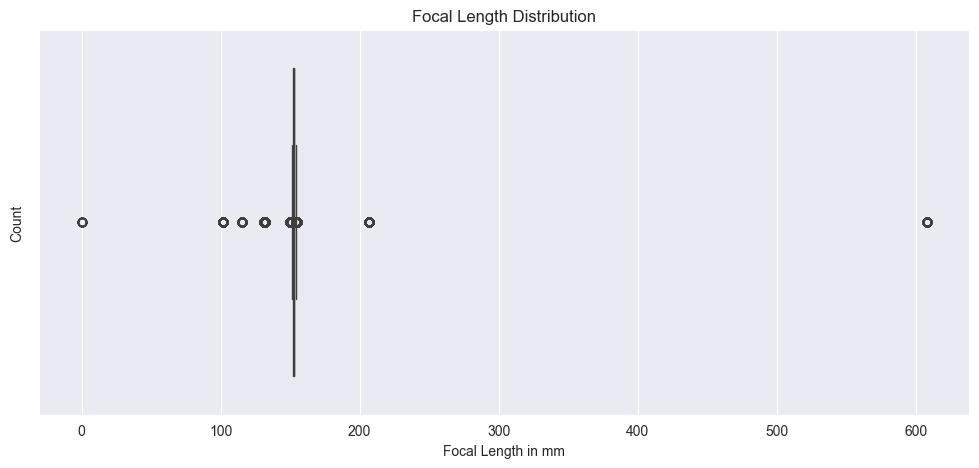

In [48]:
fig = plt.figure(figsize=(12, 5))
ax = sns.boxplot(df, x='Focal Length in mm')
ax.set_xlabel('Focal Length in mm')
ax.set_ylabel('Count')
ax.set_title('Focal Length Distribution')
plt.show()

In [50]:
df['Film Length and Width'].unique()

array(['229mm x 229mm'], dtype=object)

In [21]:
df['Quality'].describe()

count    64082.000000
mean         7.998752
std          0.099929
min          0.000000
25%          8.000000
50%          8.000000
75%          8.000000
max          8.000000
Name: Quality, dtype: float64

In [44]:
df[['Scale', 'Flying Height in Feet']].describe()

,Scale,Flying Height in Feet
count,64082.000000,64082.000000
mean,53404.055429,25944.925673
std,17747.784762,9118.622320
min,0.000000,0.000000
25%,37400.000000,17000.000000
50%,60000.000000,29923.000000
75%,63000.000000,31500.000000
max,148000.000000,74000.000000


In [38]:
df['Flying Height in Feet'].isna().value_counts()

Flying Height in Feet
False    64082
True        70
Name: count, dtype: int64

In [34]:
df['Focal Length mm'] = df['Focal Length'].apply(lambda x: x if isinstance(x, float) else float(x[:-3]))

In [22]:
df[[
    'TileId',
    'Scale',
    'Quality',
    'Image Type',
    'Cloud Cover',
    'Focal Length mm',
    'Flying Height in Feet'
]].groupby('TileId').mean().to_csv('../meta_per_tile.csv')

In [28]:
(df['Flying Height in Feet'] >= 20000).value_counts()

Flying Height in Feet
True     42860
False    21292
Name: count, dtype: int64

Unique finding, current model loss correlates to the scale and altitude of the flight. This makes intuitive sense since at higher altitudes many of the image features wash out and so the recreation is simpler, and to add onto to this it is also the majority scenario with ~66% of samples being taken over 20,000 ft

This can be seen by overlapping the average scale/altitude data of each tile to its corresponding loss.